<a href="https://colab.research.google.com/github/crar01/songsSimilar/blob/main/songSimilars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para encontrar textos similares a un texto base utilizando Machine Learning en Python, una técnica común es el modelado de temas o Topic Modeling. El modelado de temas es una técnica de procesamiento de lenguaje natural que permite identificar temas latentes o subyacentes en un corpus de documentos.

Para implementar esta técnica, se pueden utilizar bibliotecas de Python como Gensim o Scikit-Learn. A continuación, se describen los pasos generales para realizar el modelado de temas y encontrar textos similares:

Preprocesamiento de datos: antes de realizar el modelado de temas, se debe realizar un preprocesamiento de los datos, lo cual incluye la limpieza de texto, la eliminación de palabras irrelevantes (stopwords), la lematización o el stemming, entre otros pasos.

Creación del modelo de temas: una vez que se ha preprocesado el texto, se puede utilizar una técnica de modelado de temas como Latent Dirichlet Allocation (LDA) para identificar los temas latentes en el corpus. El número de temas que se desea identificar se puede especificar como un parámetro en la creación del modelo.

Encontrar documentos similares: después de haber creado el modelo de temas, se puede utilizar la técnica de similitud de coseno para encontrar documentos similares. La similitud de coseno es una medida que se utiliza para calcular la similitud entre dos vectores. En este caso, los documentos se representan como vectores en el espacio de temas, y se puede calcular la similitud entre el vector del texto base y los vectores de otros documentos en el corpus.

Presentar resultados: finalmente, se pueden presentar los documentos más similares al texto base. Dependiendo de la cantidad de documentos en el corpus, se puede considerar ordenarlos por similitud y presentar solo los primeros N documentos más similares.

In [1]:
!pip install -U spacy
!python -m spacy download es_core_news_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-02 01:52:33.942234: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 01:52:35.212871: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-02 01:52:37.745245: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42

In [2]:
# from google.colab import drive
# # drive.mount('/content/gdrive')

# from google.colab import files
# path = '/content/gdrive/My Drive/Colab Notebooks/data/'

In [3]:
import pandas as pd

# from google.colab import drive
# drive.mount('/content/gdrive')

from google.colab import files
path = '/content/drive/MyDrive/Colab Notebooks/data/'

lyrics = pd.read_csv(path+'Spotify_Songs_Links_ES.csv', delimiter=';')
lyrics['lyrics'].head(3)

0    Fuego Uoh uoh uoh La musiica del futuroo Yeah!...
1    Ihhh-yo! Ihhh-ye! Sonó la campana y el fin de ...
2    NA (Uh, ah, uh) Reykon, ey (Ah, oh) Maluma Mam...
Name: lyrics, dtype: object

In [4]:
lyrics['track_artist'][0]
lyrics['track_name'][0]


'Una Vaina Loca'

In [5]:
def eliminar_palabras_repetidas(texto):
    palabras_cancion = texto.split()
    palabras_unicas = set(palabras_cancion)
    palabras_unicas_lista = list(palabras_unicas)
    texto_sin_repetidas = " ".join(palabras_unicas_lista)
    return texto_sin_repetidas

In [6]:
lyricsList = (lyrics['lyrics'].apply(eliminar_palabras_repetidas)).to_numpy()

In [7]:
import numpy as np
import spacy
from sklearn.metrics.pairwise import cosine_similarity

# Cargar modelo de lenguaje en español de spaCy
nlp = spacy.load('es_core_news_md')

# Corpus de documentos (una lista de textos)
documentos = lyricsList

# Obtener embeddings de palabras de los documentos
document_embeddings = []
for doc in documentos:
    tokens = nlp(doc)
    doc_embedding = np.mean([token.vector for token in tokens if not token.is_stop], axis=0)
    # filtered_tokens = [token for token in doc if not token.is_stop]
    # doc_embedding = np.mean([token.vector for token in tokens], axis=0)
    document_embeddings.append(doc_embedding)

print('done...!!!')

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


done...!!!


In [8]:
base_text = """Yo que me moría por ti
Yo que por ti todo arriesgué
Mis manos en el fuego
Te di mi alma en pleno
Jamás te traicioné
Tú naciste para mentir
Pero es que la vida es así
Pero falló tu escena
Salieron mal tus cuentas
Y ya te descubrí
Infiel
¿Cómo se te ocurre que ahora vas a volver
A lastimar mis sueños y engañarme otra vez?
Puedes marcharte, contigo no voy a volver
Infiel
Yo que quemé mis manos en el fuego por ti
Te defendí ante todo hasta casi morir
Pero no tienes alma, solo sabes mentir
Y si tu amor me lastimó (Lastimó)
Otro amor me curará
Quien pierde eres tú
Porque mi amor jamás se irá
Infiel
¿Cómo se te ocurre que ahora vas a volver
A lastimar mis sueños y engañarme otra vez?
Puedes marcharte, contigo no voy a volver
Infiel
Yo que quemé mis manos en el fuego por ti
Te defendí ante todo hasta casi morir
Pero no tienes alma, solo sabes mentir
Infiel
K Rosé
Yo que te entregué el corazón
Y me pagas con la traición
Qué lástima, tus besos
Fingidos y perfectos
Rodando por mi piel
Pronto pagarás mi dolor
Porque alguien te va a lastimar
Con tus mismas mentiras
Te van a herir la vida
Como me heriste a mí
Infiel
¿Cómo se te ocurre que ahora vas a volver
A lastimar mis sueños y engañarme otra vez?
Puedes marcharte, contigo no voy a volver
Infiel
Yo que quemé mis manos en el fuego por ti
Te defendí ante todo hasta casi morir
Pero no tienes alma, solo sabes mentir
Y si tu amor me lastimó (Lastimó)
Otro amor me curará
Quien pierde eres tú
Porque mi amor jamás se irá
Infiel
¿Cómo se te ocurre que ahora vas a volver
A lastimar mis sueños y engañarme otra vez?
Puedes marcharte, contigo no voy a volver
Infiel
Yo que quemé mis manos en el fuego por ti
Te defendí ante todo hasta casi morir
Pero no tienes alma, solo sabes mentir
Infiel"""

In [9]:
import numpy as np
import spacy
from sklearn.metrics.pairwise import cosine_similarity

# Cargar modelo de lenguaje en español de spaCy
nlp = spacy.load('es_core_news_md')

# Texto base
# base_text = """Sé qué hay en tus ojos con solo mirar Que estás cansado de andar y de andar Y caminar Girando siempre en un lugar Sé que las ventanas se pueden abrir Cambiar el aire depende de ti Te ayudará Vale la pena una vez más Saber que se puede Querer que se pueda Quitarse los miedos Sacarlos afuera Pintarse la cara Color esperanza Tentar al futuro Con el corazón Es mejor perderse que nunca embarcar Mejor tentarse a dejar de intentar Aunque ya ves Que no es tan fácil empezar Sé que lo imposible se puede lograr Que la tristeza algún día se irá Y así será La vida cambia y cambiará Sentirás Que el alma vuela Por cantar una vez más Saber que se puede Querer que se pueda Quitarse los miedos Sacarlos afuera Pintarse la cara Color esperanza Tentar al futuro Con el corazón Saber que se puede Querer que se pueda Quitarse los miedos Sacarlos afuera Pintarse la cara Color esperanza Tentar al futuro Con el corazón Vale más Poder brillar Que solo buscar Ver el sol Pintarse la cara Color esperanza Tentar al futuro Con el corazón Saber que se puede Querer que se pueda Pintarse la cara Color esperanza Tentar al futuro Con el corazón Saber que se puede Querer que se pueda Quitarse los miedos Sacarlos afuera Pintarse la cara Color esperanza Tentar al futuro Con el corazón (Saber que se puede) Sabes que se puede Que puedes intentar (Saber que se puede) Querer que se pueda Pintarse la cara Color esperanza Tentar al futuro Con el corazón Saber que se puede Querer que se pueda Quitarse los miedos Sacarlos afuera Pintarse la cara Color esperanza Tentar al futuro Con el corazón"""  

# Obtener el embedding de palabras del texto base
tokens = nlp(eliminar_palabras_repetidas(base_text))
# tokens = nlp(base_text)

base_embedding = np.mean([token.vector for token in tokens if not token.is_stop], axis=0)

# Calcular similitud coseno entre el texto base y los documentos
sims = cosine_similarity([base_embedding], document_embeddings)

# Presentar resultados
sorted_sims = sorted(enumerate(sims[0]), key=lambda item: -item[1])


In [10]:
for sim_doc_index, similarity in sorted_sims:
  if similarity >= 0.7:
    print(f"Artist: {lyrics['track_artist'][sim_doc_index]} | Song: {lyrics['track_name'][sim_doc_index]} | _{sim_doc_index + 1} similitud: {similarity:.2f}")

Artist: Kalimba | Song: Cicatrices | _1190 similitud: 0.87
Artist: Antonio José | Song: Me Equivocaré | _868 similitud: 0.87
Artist: Guille El Invencible | Song: Dime Si Este Amor Se Acabo | _1496 similitud: 0.86
Artist: Akwid | Song: Anda Y Ve Lo Dudo | _567 similitud: 0.86
Artist: Akwid | Song: veTE | _563 similitud: 0.85
Artist: Melendi | Song: El Ciego | _566 similitud: 0.85
Artist: Gloria Estefan | Song: Lo Nuestro | _1311 similitud: 0.85
Artist: Gloria Estefan | Song: No Te Olvidaré | _1466 similitud: 0.85
Artist: Alex Ubago | Song: Maldito miedo (feat. Soge Culebra) | _351 similitud: 0.85
Artist: Prince Royce | Song: Deja vu | _873 similitud: 0.85
Artist: Marc Anthony | Song: Ahora Quien - Salsa Version | _1118 similitud: 0.85
Artist: Monchy & Alexandra | Song: Hoja En Blanco | _203 similitud: 0.85
Artist: Gente De Zona | Song: Traidora | _1595 similitud: 0.85
Artist: Alex Zurdo | Song: Sin Ti | _1110 similitud: 0.85
Artist: Héctor "El Father" | Song: Sola | _590 similitud: 0.85

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Cargar el conjunto de datos de iris
iris = load_iris()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# Entrenar un modelo de clasificación utilizando K vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Guardar el modelo en un archivo
with open('model.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [13]:
# from flask import Flask, jsonify, request
# import pickle
# from sklearn.datasets import load_iris

# app = Flask(__name__)

# # Cargar el conjunto de datos de iris para usarlo en la API
# iris = load_iris()

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Cargar el modelo de clasificación guardado en el archivo 'model.pkl'
#     with open('model.pkl', 'rb') as f:
#         model = pickle.load(f)
    
#     # Obtener los datos de las flores a partir de los datos enviados en la solicitud POST
#     data = request.get_json(force=True)
#     flower_data = [data['sepal_length'], data['sepal_width'], data['petal_length'], data['petal_width']]
    
#     # Predecir la especie de la flor
#     predicted_species = model.predict([flower_data])[0]
#     predicted_species_name = iris.target_names[predicted_species]
    
#     # Retornar la especie de la flor en formato JSON
#     return jsonify({'predicted_species': predicted_species_name})

# if __name__ == '__main__':
#     app.run(port=5000, debug=True)

Otro codigo alterno


In [14]:
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=c6b3107352f368b3220d7db8eb88233bb9bf52f694d84f9e8e55cddbce4133e5
  Stored in directory: /root/.cache/pip/wheels/da/d8/66/395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop-words


In [15]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction import _stop_words
from stop_words import get_stop_words
from sklearn.metrics.pairwise import cosine_similarity


nltk.download('stopwords')
# Descarga el corpus de canciones en español de NLTK
# nltk.download('song_lyrics')

# Carga el corpus de canciones en español de NLTK
# songs = nltk.corpus.song_lyrics.words()

# Convierte el corpus en un dataframe de pandas

def eliminar_palabras_repetidas(texto):
    palabras_cancion = texto.split()
    palabras_unicas = set(palabras_cancion)
    palabras_unicas_lista = list(palabras_unicas)
    texto_sin_repetidas = " ".join(palabras_unicas_lista)
    return texto_sin_repetidas

df = lyrics # pd.DataFrame(songs, columns=['lyrics'])

# Elimina los signos de puntuación
df['lyrics'] = df['lyrics'].str.replace('[^\w\s]','')
df['lyrics'] = df['lyrics'].apply(eliminar_palabras_repetidas)

# Elimina las stop-words
stop_words = list(get_stop_words('es')) + list(stopwords.words('spanish'))
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop_words)]))

# Crea una matriz de características TF-IDF
# vectorizer = TfidfVectorizer(max_df=0.80, min_df=0.4)
vectorizer = TfidfVectorizer(max_df=0.75, min_df=0.15)
X = vectorizer.fit_transform(df['lyrics'])

# Aplica K-means para agrupar las canciones en 5 grupos basados en el sentimiento
kmeans = KMeans(n_clusters=22, random_state=0).fit(X)

# Texto de la canción que queremos comparar
texto_cancion = eliminar_palabras_repetidas(base_text)
# texto_cancion = base_text


# Elimina los signos de puntuación y las stop-words del texto de la canción
texto_cancion_procesado = texto_cancion.lower().replace('[^\w\s]','')
texto_cancion_procesado = ' '.join([word for word in texto_cancion_procesado.split() if word not in (stop_words)])

# Transforma el texto de la canción en un vector TF-IDF
vector_cancion = vectorizer.transform([texto_cancion_procesado])

# Encuentra el grupo al que pertenece la canción dada
grupo_cancion = kmeans.predict(vector_cancion)

# Encuentra otras canciones en el mismo grupo
indices_canciones_similares = np.where(kmeans.labels_ == grupo_cancion)[0]

# Calcula la similitud coseno entre el vector de la canción dada y todas las otras canciones en el mismo grupo
similitudes = cosine_similarity(vector_cancion, X[indices_canciones_similares])

# Ordena las canciones por similitud y muestra las más similares
indices_canciones_ordenadas = np.argsort(similitudes)[0][::-1]

canciones_similares = df.iloc[indices_canciones_similares[indices_canciones_ordenadas]]['track_name'].values

# Muestra las canciones similares
print(f'Canciones similares a "{texto_cancion}":')
for cancion in canciones_similares:
    print(cancion)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-15-19882fd647f8>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['lyrics'] = df['lyrics'].str.replace('[^\w\s]','')
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Canciones similares a "besos Pronto (Lastimó) pagas Puedes mi tus lastimar naciste Porque ya te marcharte, alma, traicioné Quien sabes va morir mí Jamás amor alma hasta casi contigo tienes con arriesgué van Tú Mis piel se cuentas dolor a en así mentir mismas pleno Te por jamás Fingidos herir vas vez? corazón entregué Otro mentiras Pero fuego ante defendí si ¿Cómo ahora volver Qué voy irá Como di Con engañarme no K me pagarás alguien descubrí perfectos escena ti otra para manos moría todo solo Rosé ocurre Infiel es tu lástima, falló A Y mis vida sueños pierde heriste lastimó traición mal eres que Salieron y tú Yo el la Rodando quemé curará":
Tu Eres Ajena
Al Filo de Tu Amor
Aviéntame
Estar Enamorado
DUELE EL CORAZON
No vuelvas
Volverte A Ver
Volverte A Ver - MTV Unplugged
Oye Mi Canto - Single Version
Amor, Amor, Amor (feat. Wisin)
La Tierra del Olvido
Caderas Blancas
Colgando en tus manos (con Marta Sánchez)
Colgando en tus manos (con Marta Sánchez)
No Te Cuesta Nada
Amante Bandido
El 

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Calcular la inercia
inercia = kmeans.inertia_
print("Inercia: ", inercia)

# Calcular el coeficiente de silueta
coef_silueta = silhouette_score(matriz_tfidf, kmeans.labels_, metric='euclidean')
print("Coeficiente de silueta: ", coef_silueta)

# Calcular el Calinski-Harabasz Index
ch_index = calinski_harabasz_score(matriz_tfidf.toarray(), kmeans.labels_)
print("Calinski-Harabasz Index: ", ch_index)

# Calcular el Davies-Bouldin Index
db_index = davies_bouldin_score(matriz_tfidf.toarray(), kmeans.labels_)
print("Davies-Bouldin Index: ", db_index)

Inercia:  1035.8105006540773
Coeficiente de silueta:  -0.0009143030358518651
Calinski-Harabasz Index:  2.328111613977853
Davies-Bouldin Index:  9.427509372023591


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


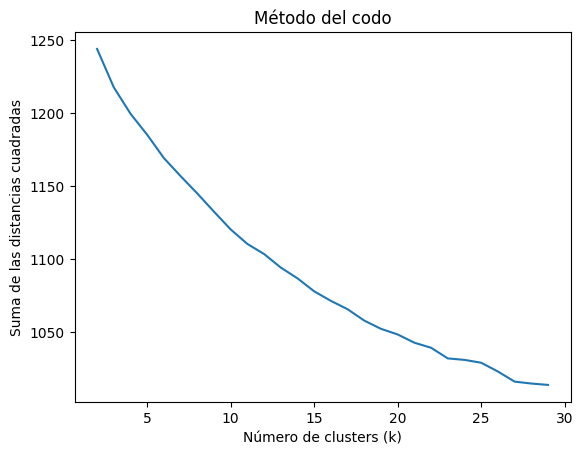

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Creamos una lista vacía para almacenar los valores de la suma de las distancias cuadradas
sse = []

# Evaluamos el modelo para diferentes valores de k
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficamos la curva del codo
plt.plot(range(2, 30), sse)
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de las distancias cuadradas')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

# Evaluamos el modelo para diferentes valores de k
max = 0
kIdeal = 0
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    if score > max :
      max = score
      kIdeal = k
    print("Para k=%d, el coeficiente de silueta es %0.3f" % (k, score))

print("El maximo es: ", kIdeal, " grupos, con silueta: " ,max)

Para k=2, el coeficiente de silueta es 0.039


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=3, el coeficiente de silueta es 0.029


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=4, el coeficiente de silueta es 0.026


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=5, el coeficiente de silueta es 0.027


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=6, el coeficiente de silueta es 0.028


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=7, el coeficiente de silueta es 0.030


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=8, el coeficiente de silueta es 0.031


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=9, el coeficiente de silueta es 0.032


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=10, el coeficiente de silueta es 0.033


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=11, el coeficiente de silueta es 0.034


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=12, el coeficiente de silueta es 0.034


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=13, el coeficiente de silueta es 0.034


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=14, el coeficiente de silueta es 0.033


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=15, el coeficiente de silueta es 0.036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=16, el coeficiente de silueta es 0.034


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=17, el coeficiente de silueta es 0.036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=18, el coeficiente de silueta es 0.035


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=19, el coeficiente de silueta es 0.036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=20, el coeficiente de silueta es 0.036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=21, el coeficiente de silueta es 0.036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=22, el coeficiente de silueta es 0.036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=23, el coeficiente de silueta es 0.039


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=24, el coeficiente de silueta es 0.036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=25, el coeficiente de silueta es 0.032


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=26, el coeficiente de silueta es 0.037


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=27, el coeficiente de silueta es 0.035


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=28, el coeficiente de silueta es 0.036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=29, el coeficiente de silueta es 0.035
El maximo es:  23  grupos, con silueta:  0.039017657522973676


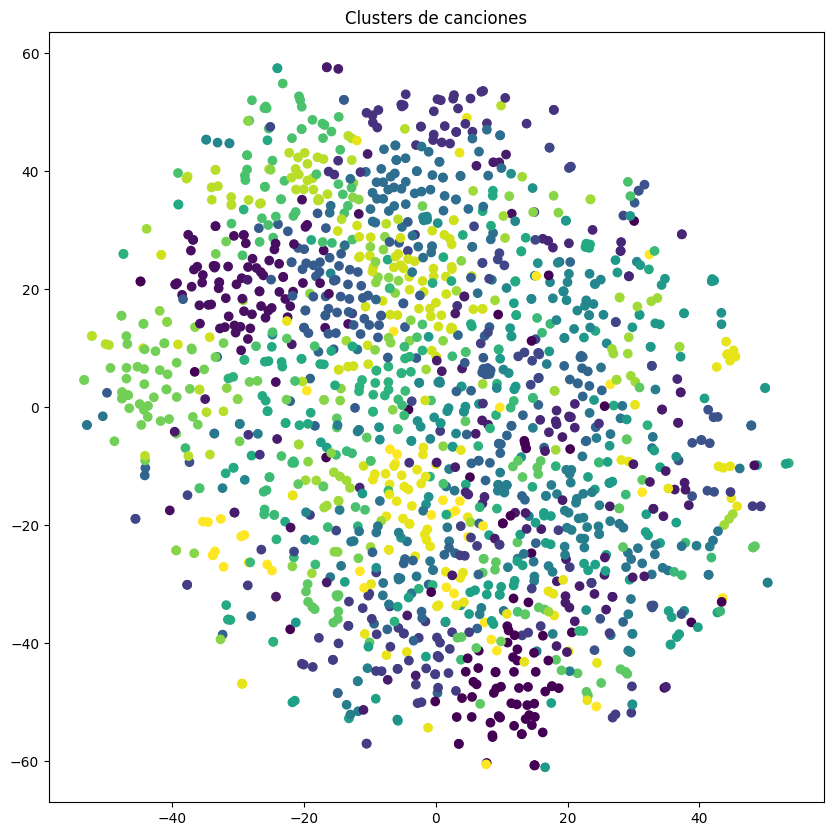

In [19]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Gráfico de puntos en el espacio reducido por t-SNE, coloreados por cluster
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
ax.set_title('Clusters de canciones')
plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

# cargar los datos de las canciones
datos = pd.read_csv(path+'Spotify_Songs_Links_ES.csv', delimiter=';')

# definir el pipeline de preprocesamiento y modelo
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('kmeans', KMeans(n_clusters=22, random_state=42))
])

# definir los valores para max_df y min_df que se van a probar
parameters = {
    'tfidf__max_df': (0.5, 0.75, 0.9),
    'tfidf__min_df': (0.05, 0.1, 0.15, 0,2)
}

# realizar la búsqueda en la cuadrícula utilizando la validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(datos['lyrics'].apply(eliminar_palabras_repetidas))

# imprimir los valores óptimos de max_df y min_df
print("Mejores parámetros: ")
print(grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mejores parámetros: 
{'tfidf__max_df': 0.75, 'tfidf__min_df': 0.15}
